In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)
    
    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])
    
    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (1000, 50, 1)
Output shape: (1000,)


In [6]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

C:\Users\Nanditha Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.3794 - val_loss: 0.1544
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0575 - val_loss: 0.0100
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028 - val_loss: 4.8435e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.3734e-04 - val_loss: 3.0166e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.6646e-04 - val_loss: 1.1730e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 8.1634e-05 - val_loss: 4.8314e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 3.5703e-05 - val_loss: 2.1691e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 1.5161e-05 - val_loss: 9.4570e-06
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 7.4109e-06 - val_loss: 5.1149e-06
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.5999e-06 - val_loss: 3.9181e-06
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.2490e-06 - val_loss: 3.3805

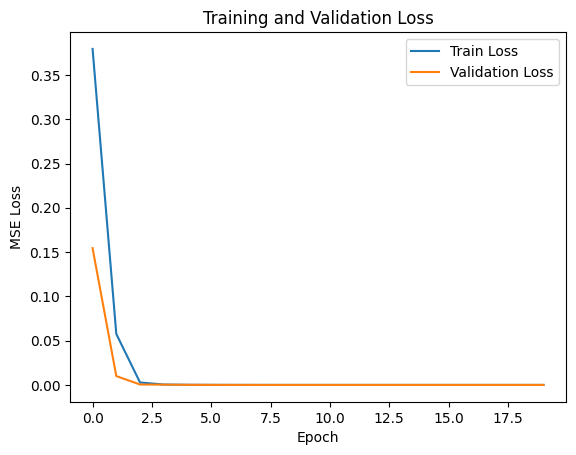

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step


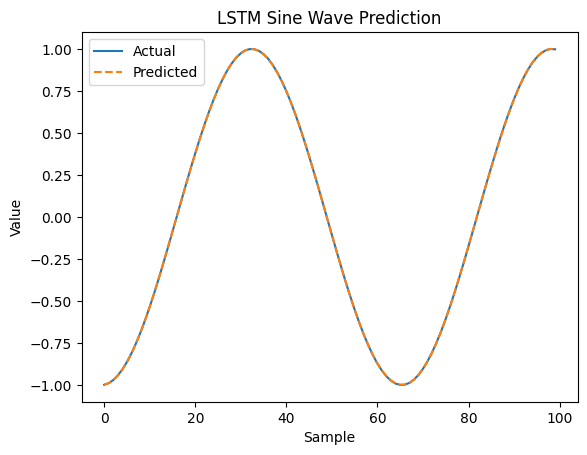

In [9]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()